# Machine Learning using Python 
# Exam – Paper 1

# Part I: Supervised Learning

## Importing necessay Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler    

## Loading the Dataset

In [2]:
df=pd.read_csv("bank.csv",sep=";")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Understanding the data

In [4]:
df.shape

(41188, 21)

In [5]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [10]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:>

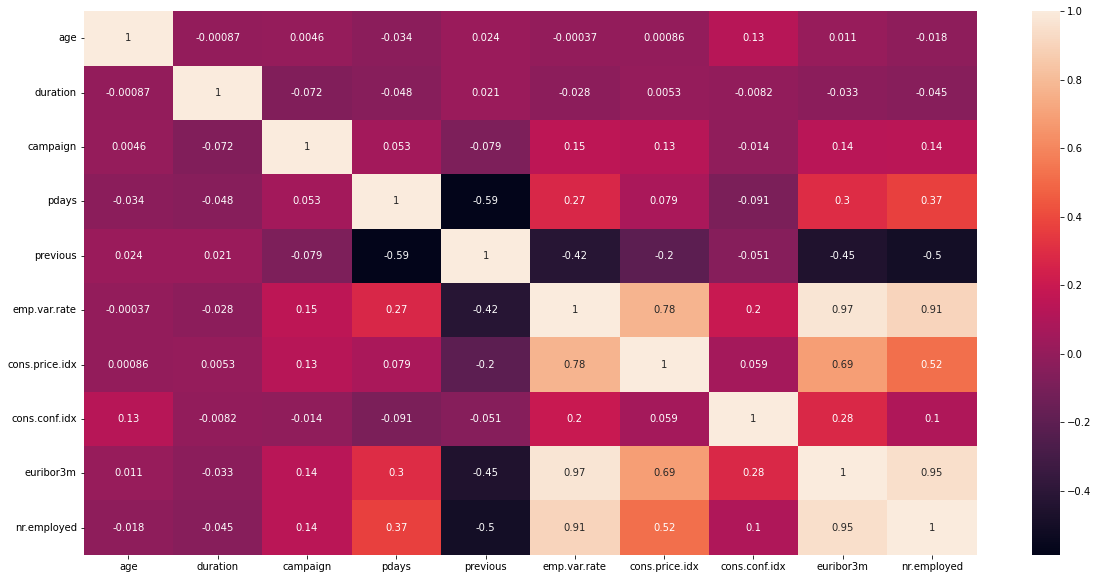

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True)

#### Q1. What does the primary analysis of several categorical features reveal?

### 1) Count of categorical features : 11
### 2) Dependent variable Y is imbalanced no - 88.73%, yes - 11.27%
### 3) Unkown Value in Marital Status is negligible
### 4) Illiterate count in Education feature is also negligible
### 5) Unknown count in Default is huge, also yes count is only 3
### 6) In Month feature there is no data point present for Jan and Feb months

#### Q2. Perform the following Exploratory Data Analysis tasks:
#### a. Missing Value Analysis
#### b. Label Encoding wherever required
#### c. Selecting important features based on Random Forest
#### d. Handling unbalanced data using SMOTE
#### e. Standardize the data using the anyone of the scalers provided by sklearn

## Data Preparation

### 2 a). Missing value analysis

In [12]:
df1=df.copy()

In [13]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### There are no missing values 

### 2 b).Label Encoding

#### Encoding all the categorical using label encoding

In [14]:
category_features = df1.select_dtypes(include=['object']).columns.values
for col in category_features:
    print(col)

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


#### These are the categorical columns 

In [15]:
cols=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)

In [16]:
df1.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

In [17]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### All the categorical columns has been encoded

### 2 c). Selecting important features based on Random Forest

In [18]:
x=df1.drop(['y'],axis=1)
y=df1.y

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [21]:
sel.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True])

In [22]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

4

In [23]:
print(selected_feat)


Index(['age', 'duration', 'euribor3m', 'nr.employed'], dtype='object')


#### These are the important features  ['age', 'duration', 'euribor3m', 'nr.employed']

### 2 d).Handling unbalanced data using SMOTE

In [24]:
df1['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [25]:
sm = SMOTE(random_state = 2)

In [26]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 3252
Before OverSampling, counts of label '0': 25579 



In [28]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 25579
After OverSampling, counts of label '0': 25579


### 2 e).Standardize the data using the anyone of the scalers provided by sklearn

#### Standardizing the data using standard scaler

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.fit_transform(X_train)    
X_test= scaler.transform(X_test) 

#### Q3. Build the following Supervised Learning models:
#### a. Logistic Regression
#### b. AdaBoost
#### c. Naïve Bayes
#### d. KNN
#### e. SVM

## Building Models

### 3 a).Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
model.score(X_train,y_train)*100

90.98539766223857

In [32]:
model.score(X_test,y_test)*100

91.1548110382779

In [33]:
y_pred_log = model.predict(X_test)

### 3 b).Adaboost

In [34]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [35]:
model1 = abc.fit(X_train, y_train)

In [36]:
model1.score(X_train,y_train)*100

90.97152370712081

In [37]:
model1.score(X_test,y_test)*100

91.16290361738287

In [38]:
y_pred_log1 = model1.predict(X_test)

### 3 c).Naïve Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, y_train.ravel())

GaussianNB()

In [40]:
model2.score(X_train,y_train)*100

84.5340085324824

In [41]:
model2.score(X_test,y_test)*100

84.77785870356882

In [42]:
y_pred_log2 = model2.predict(X_test)

### 3 d).KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors= 6 )
model3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [44]:
model3.score(X_train,y_train)*100

92.00513336339357

In [45]:
model3.score(X_test,y_test)*100

90.29699765315206

In [46]:
y_pred_log3 = model3.predict(X_test)

### 3 e).SVM

In [47]:
from sklearn import svm
model4=svm.SVC(kernel='linear')
model4.fit(X_train,y_train)

SVC(kernel='linear')

In [48]:
model4.score(X_train,y_train)*100

90.19805070930596

In [49]:
model4.score(X_test,y_test)*100

89.8761835396941

In [50]:
y_pred_log4 = model4.predict(X_test)

### Q4. Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not

In [51]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [52]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

In [53]:
roc1=roc_auc_score(y_test, y_pred_log1)
acc1 = accuracy_score(y_test, y_pred_log1)
prec1 = precision_score(y_test, y_pred_log1)
rec1 = recall_score(y_test, y_pred_log1)
f11 = f1_score(y_test, y_pred_log1)

In [54]:
roc2=roc_auc_score(y_test, y_pred_log2)
acc2 = accuracy_score(y_test, y_pred_log2)
prec2 = precision_score(y_test, y_pred_log2)
rec2= recall_score(y_test, y_pred_log2)
f12 = f1_score(y_test, y_pred_log2)

In [55]:
roc3=roc_auc_score(y_test, y_pred_log3)
acc3 = accuracy_score(y_test, y_pred_log3)
prec3 = precision_score(y_test, y_pred_log3)
rec3 = recall_score(y_test, y_pred_log3)
f13 = f1_score(y_test, y_pred_log3)

In [56]:
roc4=roc_auc_score(y_test, y_pred_log4)
acc4 = accuracy_score(y_test, y_pred_log4)
prec4 = precision_score(y_test, y_pred_log4)
rec4 = recall_score(y_test, y_pred_log4)
f14 = f1_score(y_test, y_pred_log4)

In [57]:
results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc],['AdaBoost', acc1,prec1,rec1, f11,roc1],['Naïve Bayes', acc2,prec2,rec2, f12,roc2],['KNN', acc3,prec3,rec3, f13,roc3],['SVM', acc4,prec4,rec4, f14,roc4]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

In [58]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.911548,0.670915,0.417147,0.514438,0.695628
1,AdaBoost,0.911629,0.666667,0.426513,0.520211,0.699764
2,Naïve Bayes,0.847779,0.386667,0.605908,0.472074,0.742146
3,KNN,0.902970,0.648352,0.297550,0.407901,0.638565
4,SVM,0.898762,0.617094,0.260086,0.365940,0.619833


### After seeing the performance metrics we can say that the best model is "ADABOOST" 

# --------------------------------------------------------------------------------------------------------------

# Part II: Time Series

## Importing necessary Libraries

In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

## Loading the dataset

In [60]:
df = pd.read_csv("MonthWiseMarketArrivals_clean.csv")
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


## Underdstanding of the data

In [61]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [62]:
df.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,December-2015


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [64]:
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [65]:
df.describe(include="all")

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
count,10227,10227,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000,10227,10227,10227
unique,120,12,NaN,NaN,NaN,NaN,NaN,21,117,242
top,LASALGAON(MS),February,NaN,NaN,NaN,NaN,NaN,MS,LASALGAON,September-2015
freq,242,930,NaN,NaN,NaN,NaN,NaN,4354,242,97
mean,NaN,NaN,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345,NaN,NaN,NaN
std,NaN,NaN,4.372841,1.244087e+05,673.121850,979.658874,818.471498,NaN,NaN,NaN
min,NaN,NaN,1996.000000,2.000000e+01,16.000000,145.000000,80.000000,NaN,NaN,NaN
25%,NaN,NaN,2006.000000,8.898000e+03,209.000000,557.000000,448.000000,NaN,NaN,NaN
50%,NaN,NaN,2009.000000,2.746000e+04,440.000000,923.000000,747.000000,NaN,NaN,NaN
75%,NaN,NaN,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000,NaN,NaN,NaN


## Preparation of the data

### Q1. Get the modal price of onion for each month for the Mumbai market 

In [66]:
mumb=df.loc[df.city == "MUMBAI"]
mumb

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008
...,...,...,...,...,...,...,...,...,...,...
6795,MUMBAI,December,2011,290350,519,994,749,MS,MUMBAI,December-2011
6796,MUMBAI,December,2012,218500,1048,1609,1330,MS,MUMBAI,December-2012
6797,MUMBAI,December,2013,226385,1298,1976,1639,MS,MUMBAI,December-2013
6798,MUMBAI,December,2014,294150,1433,2178,1802,MS,MUMBAI,December-2014


In [67]:
mop=pd.concat([mumb.date,mumb.priceMod],axis=1)

In [68]:
mop.set_index('date')

,priceMod
date,
January-2004,849
January-2005,387
January-2006,402
January-2007,997
January-2008,448
...,...
December-2011,749
December-2012,1330
December-2013,1639


In [69]:
df.date = pd.DatetimeIndex(df.date)

In [70]:
df.index = pd.PeriodIndex(df.date, freq="M")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


### Q2. Build time series model and check the performance of the model using RMSE

### Linear Model

In [71]:
df_mumb = df.loc[df.city == "MUMBAI"].copy()
df_mumb.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2005-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
2006-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
2007-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
2008-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [72]:
df_mumb = df_mumb.drop(["market","month","year","priceMin","priceMax","state","city"], axis=1)
df_mumb.head()

,quantity,priceMod,date
date,,,
2004-01,267100,849,2004-01-01
2005-01,275845,387,2005-01-01
2006-01,228000,402,2006-01-01
2007-01,205200,997,2007-01-01
2008-01,267550,448,2008-01-01


In [73]:
df_mumb["log_priceMod"] = np.log(df_mumb.priceMod)

In [74]:
df_mumb_mean = df_mumb.log_priceMod.mean()
df_mumb["mean_price"] = np.exp(df_mumb_mean)

In [75]:
df_mumb["timeindex"] = df_mumb.date - df_mumb.date.min()
df_mumb.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0 days
2005-01,275845,387,2005-01-01,5.958425,889.100239,366 days
2006-01,228000,402,2006-01-01,5.996452,889.100239,731 days
2007-01,205200,997,2007-01-01,6.904751,889.100239,1096 days
2008-01,267550,448,2008-01-01,6.104793,889.100239,1461 days


In [76]:
df_mumb["timeindex"] = df_mumb["timeindex"]/np.timedelta64(1,"M")
df_mumb.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0.000000
2005-01,275845,387,2005-01-01,5.958425,889.100239,12.024888
2006-01,228000,402,2006-01-01,5.996452,889.100239,24.016920
2007-01,205200,997,2007-01-01,6.904751,889.100239,36.008953
2008-01,267550,448,2008-01-01,6.104793,889.100239,48.000986


In [77]:
df_mumb["timeindex"] = df_mumb["timeindex"].round(0).astype(int)
df_mumb.tail()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2011-12,290350,749,2011-12-01,6.618739,889.100239,95
2012-12,218500,1330,2012-12-01,7.192934,889.100239,107
2013-12,226385,1639,2013-12-01,7.401842,889.100239,119
2014-12,294150,1802,2014-12-01,7.496652,889.100239,131
2015-12,302409,1542,2015-12-01,7.340836,889.100239,143


In [78]:
linear_model = smf.ols('log_priceMod ~ timeindex', data = df_mumb).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 23 May 2022   Prob (F-statistic):           8.89e-22
Time:                        17:33:23   Log-Likelihood:                -96.121
No. Observations:                 146   AIC:                             196.2
Df Residuals:                     144   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0284      0.078     77.785      0.000       5.875       6.182
timeindex      0.0105      0.001     11.370      0.000       0.009       0.012
==============================================================================
Omnibus:                        7.658   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.054
Skew:                           0.566   Prob(JB):                       0.0178
Kurtosis:                       2.791   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.02841087, 6.15450176, 6.28059265, 6.40668353, 6.53277442,
       6.65886531, 6.7849562 , 6.91104708, 7.03713797, 7.16322886,
       7.28931975, 7.41541064, 7.54150152, 6.03891844, 6.16500933,
       6.29110022, 6.41719111, 6.543282  , 6.66937288, 6.79546377,
       6.92155466, 7.04764555, 7.17373643, 7.29982732, 7.42591821,
       7.5520091 , 6.04942602, 6.17551691, 6.30160779, 6.42769868,
       6.55378957, 6.67988046, 6.80597134, 6.93206223, 7.05815312,
       7.18424401, 7.3103349 , 7.43642578, 6.05993359, 6.18602448,
       6.31211537, 6.43820626, 6.56429714, 6.69038803, 6.81647892,
       6.94256981, 7.06866069, 7.19475158, 7.32084247, 7.44693336,
       6.07044117, 6.19653205, 6.32262294, 6.44871383, 6.57480472,
       6.70089561, 6.82698649, 6.95307738, 7.07916827, 7.20525916,
       7.33135004, 7.45744093, 6.08094874, 6.20703963, 6.33313052,
       6.4592214 , 6.58531229, 6.71140318, 6.83749407, 6.96358495,
       7.08967584, 7.21576673, 7.34185762, 7.46794851, 6.09145

In [80]:
df_mumb["linear_price"] = np.exp(linear_model_pred)
df_mumb.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price
date,,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0,415.054929
2005-01,275845,387,2005-01-01,5.958425,889.100239,12,470.832196
2006-01,228000,402,2006-01-01,5.996452,889.100239,24,534.105105
2007-01,205200,997,2007-01-01,6.904751,889.100239,36,605.880962
2008-01,267550,448,2008-01-01,6.104793,889.100239,48,687.302435


In [81]:
model_linear_forecast_manual = 0.0093 * 146 + 6.1121
model_linear_forecast_manual

7.4699

In [82]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [83]:
linear_model_RMSE = RMSE(df_mumb.priceMod, df_mumb.linear_price)
linear_model_RMSE

724.7073314178772

In [84]:
np.exp(model_linear_forecast_manual)

1754.4312336793307

In [85]:
Result_df = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_df.loc[0,"Model"] = "Linear Model"
Result_df.loc[0,"Forcast"] = np.exp(model_linear_forecast_manual)
Result_df.loc[0,"RMSE"] = linear_model_RMSE
Result_df

,Model,Forcast,RMSE
0,Linear Model,1754.431234,724.707331


### Thus we have build a time series model and checked the performance of the model using RMSE

### Q3. Plot ACF and PACF plots 

In [86]:
df_mumb["shift_log_priceMod"] = df_mumb.log_priceMod.shift()
df_mumb["log_priceMod_diff"] = df_mumb.log_priceMod - df_mumb.shift_log_priceMod

In [87]:
ts = df_mumb.log_priceMod
ts_diff = df_mumb.log_priceMod_diff
ts_diff.dropna(inplace = True)

In [88]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_acf

C:\Users\sanke\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.54612312,  0.35974009, -0.48269918,  0.31064144,
       -0.28581108,  0.25488628, -0.17927192,  0.20121241, -0.38328221,
        0.23712336, -0.33378314,  0.65536578, -0.26709031,  0.18329631,
       -0.31617105,  0.16054614, -0.14311553,  0.12853298, -0.08896203,
        0.17512094])

### ACF Plot

<AxesSubplot:>

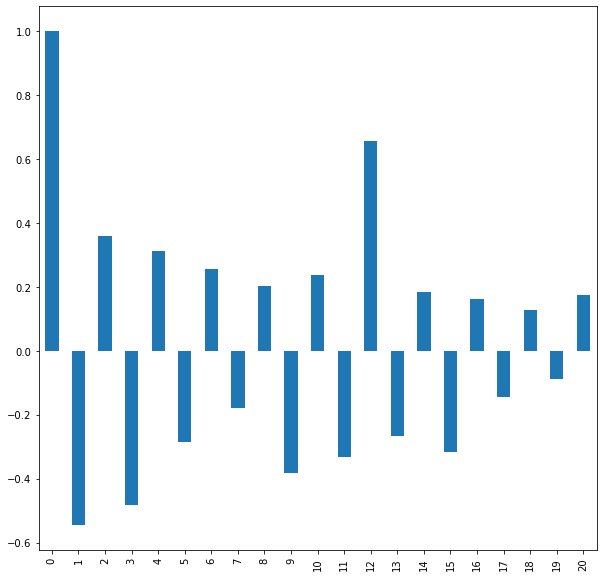

In [89]:
plt.figure(figsize=(10,10))
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar")

### PACF plot

<AxesSubplot:>

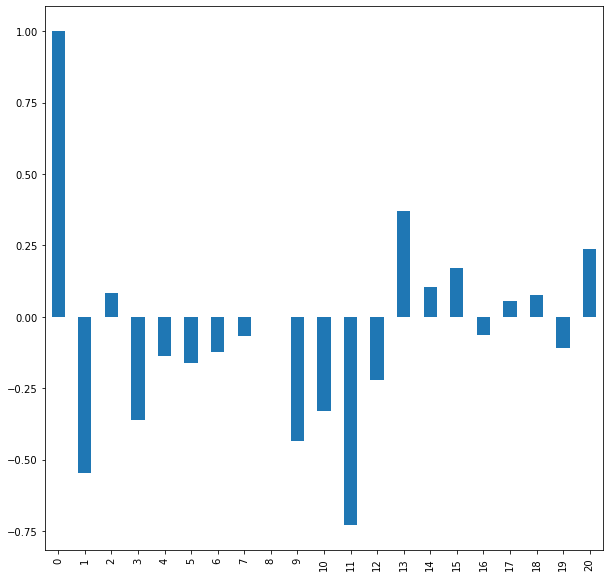

In [90]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
plt.figure(figsize=(10,10))
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar")

### Thus we have plotted the ACF and PACF plots